In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
dados_vinhos = pd.DataFrame({
    'substancia':['alcool','gasolina','leite','querosene','oleo','vinho'],
    'concentracao': [12.5,0.1,4.0,1.2,0.5,15.0],
    'teor alcoolico' : [50,0.05,0.01,0.02,0.01,12.5],
})

In [5]:
dados_vinho = pd.get_dummies(dados_vinhos, columns=['substancia'])

In [6]:
dados_vinho

,concentracao,teor alcoolico,substancia_alcool,substancia_gasolina,substancia_leite,substancia_oleo,substancia_querosene,substancia_vinho
0,12.5,50.00,True,False,False,False,False,False
1,0.1,0.05,False,True,False,False,False,False
2,4.0,0.01,False,False,True,False,False,False
3,1.2,0.02,False,False,False,False,True,False
4,0.5,0.01,False,False,False,True,False,False
5,15.0,12.50,False,False,False,False,False,True


In [17]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(dados_vinho)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [18]:
sse = kmeans.inertia_
print(sse)

0.0


In [19]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'segmentação de vinhos')

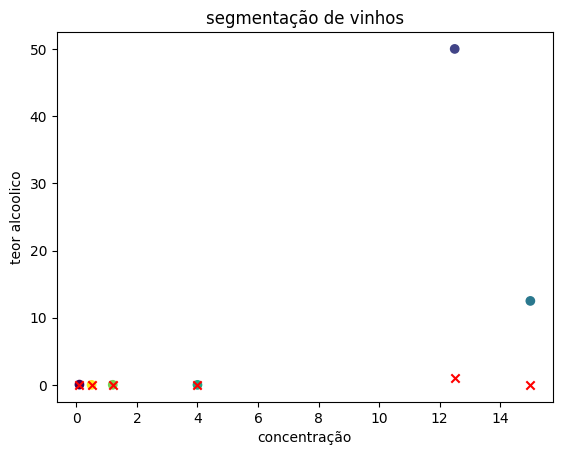

In [20]:
plt.scatter(dados_vinho['concentracao'],dados_vinho['teor alcoolico'],c=labels)
plt.scatter(centroids[:,0],centroids[:,2],marker= 'x', color='red')
plt.xlabel('concentração')
plt.ylabel('teor alcoolico')
plt.title('segmentação de vinhos')

In [21]:
dados_vinho['grupo'] = labels
grouped_data = dados_vinho.groupby('grupo').mean()
print(grouped_data)

       concentracao  teor alcoolico  substancia_alcool  substancia_gasolina  \
grupo                                                                         
0               0.1            0.05                0.0                  1.0   
1              12.5           50.00                1.0                  0.0   
2              15.0           12.50                0.0                  0.0   
3               4.0            0.01                0.0                  0.0   
4               1.2            0.02                0.0                  0.0   
5               0.5            0.01                0.0                  0.0   

       substancia_leite  substancia_oleo  substancia_querosene  \
grupo                                                            
0                   0.0              0.0                   0.0   
1                   0.0              0.0                   0.0   
2                   0.0              0.0                   0.0   
3                   1.0              